In [37]:
from sklearn.naive_bayes import CategoricalNB, MultinomialNB
import numpy as np
import pandas as pd

In [38]:
# Get all class internals

def call_method(object, name):
    return getattr(object, name)()


def get_methods(object):
    methodList = []
    df = pd.DataFrame([], columns=["method_name", "description"])
    print(len(dir(object)))
    print("-----------")
    for method_name in dir(object):
        try:
            if callable(getattr(object, method_name)):
                methodList.append(str(method_name))
            else:
                methodList.append(str(method_name))
                print(method_name, " not collable")
        except:
            # print(method_name, " not executable")
            # methodList.append(str(method_name))
            pass

    print("methodList = ", len(methodList))
    for method in methodList:
        try:
            docstring = str(getattr(object, method).__doc__)
            call_res = method + " = " + str(call_method(object, method))
            new_row = {"method_name": method, "description": docstring[:100] + '\n' + '------\n'+ call_res }
            df = df.append(new_row,ignore_index=True)
        except:
            print(method, "", docstring)
    df.to_csv("out.csv", index = False, header=True)

    return df

In [39]:
# x = np.array([[1, 1],
#               [1, 1],
#               [1, 1],
#               [1, 1],
#               [1, 1]])

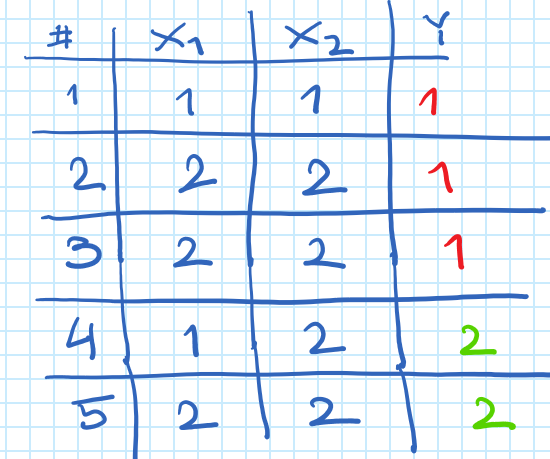

In [40]:
# x = np.array([[1, 1],
#               [2, 2],
#               [2, 2],
#               [1, 2],
#               [2, 2]])

x = np.array([[1, 0],
              [1, 0],
              [0, 1],
              [0, 1],
              [1, 1],
              [1, 1],
              [0, 0],
              [0, 1]])

# x = np.array([[1, 0],
#               [1, 0],
#               [0, 1],
#               [0, 1],
#               [1, 1],
#               [1, 1],
#               [0, 0],
#               [0, 0],
#               [0, 1]])              


y = np.array([0, 1, 0, 1, 0, 1, 0, 0])

In [41]:
clf = CategoricalNB(alpha=0)
# clf = MultinomialNB()
# clf.n_categories_ = [2, 2]
clf.fit(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


CategoricalNB(alpha=0, class_prior=None, fit_prior=True)

In [42]:
np.exp(clf.class_log_prior_)

array([0.625, 0.375])

In [43]:
clf.predict(x)

array([0, 0, 0, 0, 1, 1, 0, 0])

In [44]:


print("clf._get_coef() =\n", clf._get_coef())
print("clf._get_intercept() =", clf._get_intercept())
print("clf._get_param_names() =", clf._get_param_names())
print("clf.alpha =", clf.alpha)
#print("clf.category_count_ =\n", clf.category_count_)
# print("clf.category_count_[0] =\n", clf.category_count_[0])
# print("clf.category_count_[1] =\n", clf.category_count_[1])
print("clf.class_count_ =", clf.class_count_)
print("clf.class_log_prior_ =", clf.class_log_prior_)
print("np.exp(clf.class_log_prior_) =", np.exp(clf.class_log_prior_))
print("clf.class_prior =", clf.class_prior)
# the following is like unique of y
print("clf.classes_ =", clf.classes_)
print("clf.coef_ =", clf.coef_)
# Most likely, it corresponds to category counts, 
# and it gives logarithms of conditional probabilities
print("clf.feature_log_prob_ =", clf.feature_log_prob_)
print("clf.feature_log_prob_[0] =\n", clf.feature_log_prob_[0])
print("clf.feature_log_prob_[1] =\n", clf.feature_log_prob_[1])
# Get rid of logarithms again
print("np.exp(clf.feature_log_prob_[0]) =\n", np.exp(clf.feature_log_prob_[0]))
print("np.exp(clf.feature_log_prob_[1]) =\n", np.exp(clf.feature_log_prob_[1]))
print("clf.get_params =", clf.get_params())
print("clf.intercept_ =", clf.intercept_)
print("clf.n_features_ =", clf.n_features_)



clf._get_coef() =
 [array([[-0.91629073, -0.51082562],
       [-1.09861229, -0.40546511]])]
clf._get_intercept() = [-0.98082925]
clf._get_param_names() = ['alpha', 'class_prior', 'fit_prior']
clf.alpha = 0
clf.class_count_ = [5. 3.]
clf.class_log_prior_ = [-0.47000363 -0.98082925]
np.exp(clf.class_log_prior_) = [0.625 0.375]
clf.class_prior = None
clf.classes_ = [0 1]
clf.coef_ = [array([[-0.91629073, -0.51082562],
       [-1.09861229, -0.40546511]])]
clf.feature_log_prob_ = [array([[-0.51082562, -0.91629073],
       [-1.09861229, -0.40546511]]), array([[-0.91629073, -0.51082562],
       [-1.09861229, -0.40546511]])]
clf.feature_log_prob_[0] =
 [[-0.51082562 -0.91629073]
 [-1.09861229 -0.40546511]]
clf.feature_log_prob_[1] =
 [[-0.91629073 -0.51082562]
 [-1.09861229 -0.40546511]]
np.exp(clf.feature_log_prob_[0]) =
 [[0.6        0.4       ]
 [0.33333333 0.66666667]]
np.exp(clf.feature_log_prob_[1]) =
 [[0.4        0.6       ]
 [0.33333333 0.66666667]]
clf.get_params = {'alpha': 0, 'clas

In [45]:
methodsDf = get_methods(clf)

63
-----------
__abstractmethods__  not collable
__dict__  not collable
__doc__  not collable
__module__  not collable
__weakref__  not collable
_abc_impl  not collable
_estimator_type  not collable
alpha  not collable
category_count_  not collable
class_count_  not collable
class_log_prior_  not collable
class_prior  not collable
classes_  not collable
coef_  not collable
feature_log_prob_  not collable
fit_prior  not collable
intercept_  not collable
n_features_  not collable
methodList =  63
__abstractmethods__  frozenset() -> empty frozenset object
frozenset(iterable) -> frozenset object

Build an immutable unordered collection of unique elements.
__delattr__  Implement delattr(self, name).
__dict__  dict() -> new empty dictionary
dict(mapping) -> new dictionary initialized from a mapping object's
    (key, value) pairs
dict(iterable) -> new dictionary initialized as if via:
    d = {}
    for k, v in iterable:
        d[k] = v
dict(**kwargs) -> new dictionary initialized with the 

In [46]:
methodsDf

,method_name,description
0,__class__,Naive Bayes classifier for categorical feature...
1,__dir__,Default dir() implementation.\n------\n__dir__...
2,__getstate__,"None\n------\n__getstate__ = {'alpha': 0, 'fit..."
3,__hash__,Return hash(self).\n------\n__hash__ = 8738331...
4,__init__,None\n------\n__init__ = None
5,__init_subclass__,This method is called when a class is subclass...
6,__reduce__,Helper for pickle.\n------\n__reduce__ = (<fun...
7,__repr__,None\n------\n__repr__ = CategoricalNB(alpha=1...
8,__sizeof__,"Size of object in memory, in bytes.\n------\n_..."
9,__str__,Return str(self).\n------\n__str__ = Categoric...


In [47]:
print(str(getattr(clf, 'category_count_').__doc__))

Built-in mutable sequence.

If no argument is given, the constructor creates a new empty list.
The argument must be an iterable if specified.
